In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

def model(X, Y, train, test, activation='relu', info=True):
    """Cria uma RNA e retorna o histórico com valores de erro e acurácia para 
    treinamento e teste.
    """
    X_train, Y_train = X[train], Y[train]
    X_test, Y_test = X[test], Y[test]
    
    rna = tf.keras.models.Sequential([
        tf.keras.layers.Dense(784, activation=activation),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    rna.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
    history = rna.fit(
        X_train, Y_train,
        epochs=10,
        validation_data=(X_test, Y_test),
        verbose=0
    ).history

    if info:
        print(f'Erro:     {history["loss"][-1]:.3f}, Erro Teste:     {history["val_loss"][-1]:.3f}')
        print(f'Acurácia: {history["val_sparse_categorical_accuracy"][-1]:.3f}, Acurácia Teste: {history["val_sparse_categorical_accuracy"][-1]:.3f}')
        print('--------------------------------------')

    return history

def plot_history(history):
    """Gera um gráfico para os valores históricos de erro e acurácia do
    treinamento e teste.
    """
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))
    for h in history:
        axs[0].plot(h['loss'], color='blue', label='Treinamento')
        axs[0].plot(h['val_loss'], color='red', linestyle='dashed', label='Teste')
        axs[1].plot(h['sparse_categorical_accuracy'], color='blue', label='Treinamento')
        axs[1].plot(h['val_sparse_categorical_accuracy'], color='red', linestyle='dashed', label='Teste')
    axs[0].set_title('Erro do Treinamento e Teste')
    axs[0].set_xlabel('Época')
    axs[0].set_ylabel('Erro - Sparse Categorical Cross Entropy')
    handles, labels = axs[0].get_legend_handles_labels()
    axs[0].legend(handles, np.unique(labels), loc='upper right')
    axs[0].grid()
    axs[0].set_xlim(0, 9)
    axs[1].set_title('Acurácia do Treinamento e Teste')
    axs[1].set_xlabel('Época')
    axs[1].set_ylabel('Acurácia')
    bottom, top = axs[1].get_ylim()
    axs[1].set_ylim(bottom, 1.0)
    handles, labels = axs[1].get_legend_handles_labels()
    axs[1].legend(handles, np.unique(labels), loc='lower right')
    axs[1].grid()
    axs[1].set_xlim(0, 9)
    fig.tight_layout(pad=3.0)
    plt.show()

def plot_images(data, n_img_per_row=10, cmap='gray'):
    """Exibe várias imagens do conjunto de dados
    """
    shape = int(np.sqrt(len(data[0])))
    full_img = np.zeros((shape * n_img_per_row, shape * n_img_per_row))
    for i in range(n_img_per_row):
        ix = shape * i
        for j in range(n_img_per_row):
            iy = shape * j
            img = data[i * n_img_per_row + j].reshape((shape, shape))
            full_img[ix:ix + shape, iy:iy + shape] = img

    plt.figure(figsize=(8, 8))
    plt.imshow(full_img, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [2]:
original_df_train = pd.read_csv('data/mnist_train.csv')
original_df_test = pd.read_csv('data/mnist_test.csv')

In [3]:
df_train = original_df_train.copy()
df_test = original_df_test.copy()
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
frames = [df_train, df_test]
df = pd.concat(frames)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.8 MB


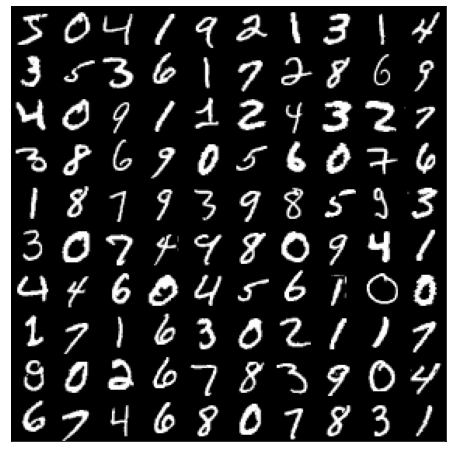

In [5]:
plot_images(df.iloc[:, 1:].to_numpy())

# Explicação do modelo utilizado
**Optimizer**: Responsável por realizar *back-propagation* utilizando gradiente descendente.

**Loss**: Utiliza entropia cruzada como função que avalia o erro.

**Metrics**: Compara os resultados preditos pela RNA com os rótulos verdadeiros dos dados.

# Análise para escolher a melhor função de ativação
Considerando as seguintes funções de ativação: sigmoidal, tangente hiperbólica, gaussiana e linear retificada, selecione aquela com maior acurácia para uma pequena amostra do conjunto original.

In [6]:
df_small = df.iloc[:int(len(df) * 0.15), :]
X, Y = df_small.iloc[:, 1:].to_numpy(), df_small.iloc[:, :1].to_numpy().transpose()[0]
X.shape, Y.shape

((10500, 784), (10500,))

In [7]:
f_ativacao = ['sigmoid', 'tanh', 'gelu', 'relu']
f_acc = []

# KFold utiliza o método k-fold-cross-validation para uma melhor amostragem
amostragem = KFold(n_splits=2, shuffle=True, random_state=42)
for f in f_ativacao:
    print(f'Testando: {f} - ', end='')
    history = []
    for train, test in amostragem.split(X):
        history.append(model(X, Y, train, test, activation=f, info=False))
    acc = [h['val_sparse_categorical_accuracy'][-1] for h in history]
    acc = np.mean(acc)
    f_acc.append(acc)
    print(f'Acc: {acc:.3f}')

Testando: sigmoid - Acc: 0.848
Testando: tanh - Acc: 0.872
Testando: gelu - Acc: 0.921
Testando: relu - Acc: 0.927


In [8]:
best_idx = np.where(f_acc == np.max(f_acc))[0][0]
print(f'Melhor função de ativação: {f_ativacao[best_idx]} - Acc: {f_acc[best_idx]:.3f}')

Melhor função de ativação: relu - Acc: 0.927


# Treinamento e Teste com o a função de ativação escolhida

In [9]:
X, Y = df.iloc[:, 1:].to_numpy(), df.iloc[:, :1].to_numpy().transpose()[0]

In [10]:
history = []

amostragem = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in amostragem.split(X):
    history.append(model(X, Y, train, test, f_ativacao[best_idx]))

Erro:     0.003, Erro Teste:     0.317
Acurácia: 0.964, Acurácia Teste: 0.964
--------------------------------------
Erro:     0.004, Erro Teste:     0.306
Acurácia: 0.962, Acurácia Teste: 0.962
--------------------------------------
Erro:     0.004, Erro Teste:     0.296
Acurácia: 0.963, Acurácia Teste: 0.963
--------------------------------------
Erro:     0.003, Erro Teste:     0.332
Acurácia: 0.961, Acurácia Teste: 0.961
--------------------------------------
Erro:     0.006, Erro Teste:     0.290
Acurácia: 0.963, Acurácia Teste: 0.963
--------------------------------------


In [11]:
acc = [h['val_sparse_categorical_accuracy'][-1] for h in history]
print(f'Desempenho final {np.mean(acc):.3f}')

Desempenho final 0.963


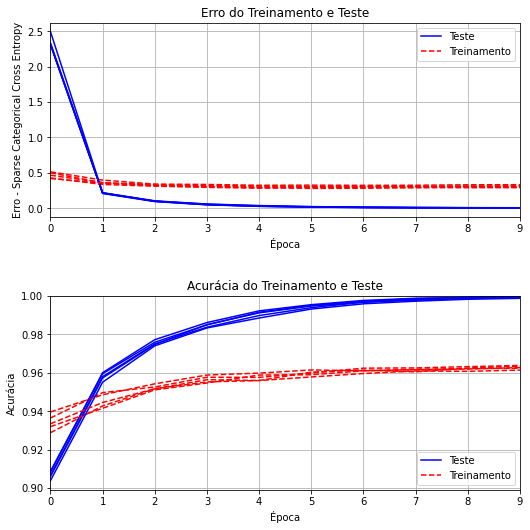

In [12]:
plot_history(history)